In [1]:
import jsonlines
import numpy as np
import torch
import matplotlib.pyplot as plt
import re
import os
from collections import defaultdict

In [2]:
def get_rules(filename):
    '''所有id下，所有rules'''
    with open(filename, "r+", encoding="utf8") as f:
        rules = []
        reader = jsonlines.Reader(f)
        for item in reader:
            rules_per_id = []
            for key in item["rules"].keys():
                rules_per_id.append(item["rules"][key]["representation"])
            rules.append(rules_per_id)
    return rules

In [3]:
def get_len_pair(rules):
    rules_pair = []
    for id in rules:
        rules_pair_per_id = []
        for rule in id:
            matchObj = re.match( r'\(\((.*)\)\s->\s\((.*)\)\)', rule, re.M|re.I)
            if_list = []
            then_list = []
            if matchObj:
                if_ = matchObj.group(1)
                if if_[0]=='(':
                    # 提取多个条件
                    if_count = if_.count('(')
                    regular = (r'\((.+)\)\s'*if_count)[:-2]
                    match_if = re.match(regular, if_, re.M|re.I)
                    for if_item in range(if_count):
                        if_list.append(match_if.group(if_item+1))
                else: 
                    # 添加单个条件
                    print('error')
                    exit(1)
                then_ = matchObj.group(2)
                if then_[0]=='(':
                    # 提取多个结果
                    print('error')
                    exit(2)
                else:
                    # 添加单个结果
                    then_list.append(then_)
            else:
                print('fail',rule)
                exit(3)
            rules_pair_per_id.append([if_list,then_list])
        rules_pair.append(rules_pair_per_id)
    return rules_pair

In [4]:
def get_if_then_map(if_then_pair):
    if_then_map = []
    for id in if_then_pair:
        if_dict = defaultdict(list)
        then_dict = defaultdict(list)
        for pair in id:
            # pair[0] if
            for if_ in pair[0]:
                for then_ in pair[1]:
                    if_dict[if_].append(then_)
            # pair[1] then
            for then_ in pair[1]:
                for if_ in pair[0]:
                    then_dict[then_].append(if_)
        if_then_map.append([if_dict,then_dict])
    return if_then_map

In [5]:
def plot_if_then_count_bar(path = None):
    if path==None:
        exit(1)
    if_then_map = get_if_then_map(get_len_pair(get_rules(path)))
    max_len = 12
    bar_width = 0.2
    if_count = np.zeros(max_len)
    then_count = np.zeros(max_len)
    for pair in if_then_map:
        for if_key in pair[0]:
            if_count[len(pair[0][if_key])] += 1
        for then_key in pair[1]:
            then_count[len(pair[1][then_key])] += 1
    plt.figure(figsize=(10,5))
    X1 = np.array(list(range(max_len)))-bar_width
    Y1 = if_count
    X2 = np.array(list(range(max_len)))+bar_width
    Y2 = then_count
    plt.bar(X1,Y1,width=2*bar_width,label = 'if')
    plt.bar(X2,Y2,width=2*bar_width,label = 'then')
    for a,b in zip(X1,Y1): 
        plt.text(a, b+100, '%d' % b, rotation=90, ha='center', va= 'bottom',fontsize=11) 
    for a,b in zip(X2,Y2): 
        plt.text(a, b+100, '%d' % b, rotation=90, ha='center', va= 'bottom',fontsize=11)  
    plt.legend()
    p1,p2 = os.path.split(path)
    p3,p4 = os.path.split(p1)
    plt.title(p4+'/'+p2)
    plt.show()

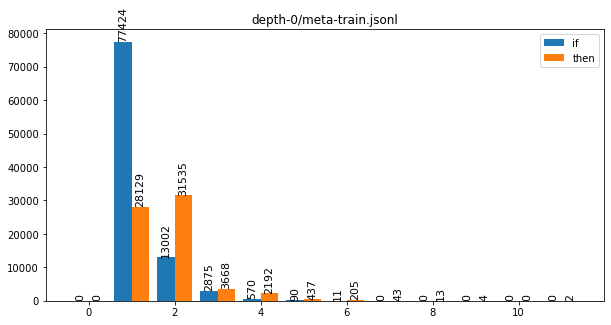

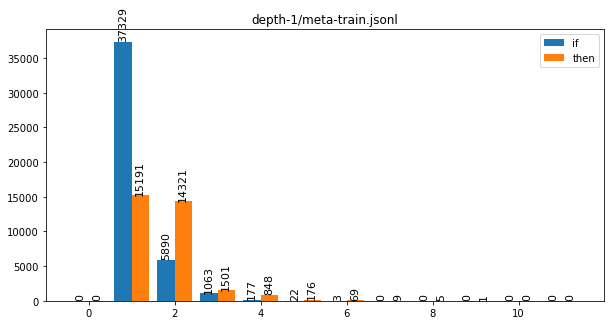

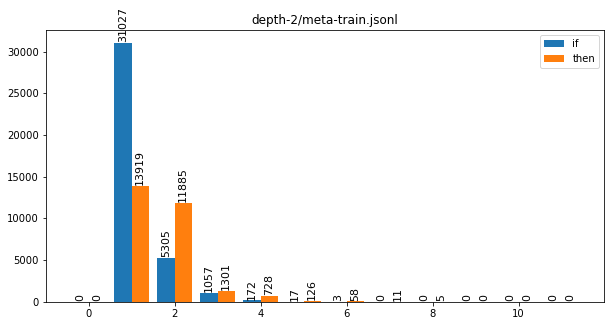

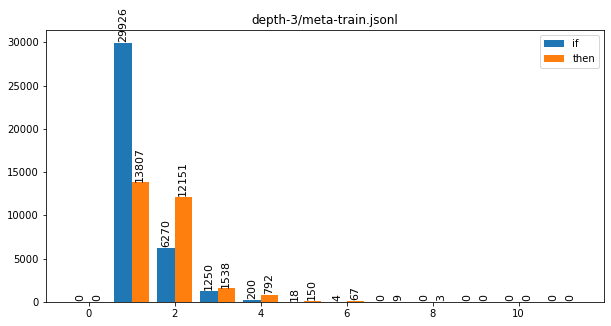

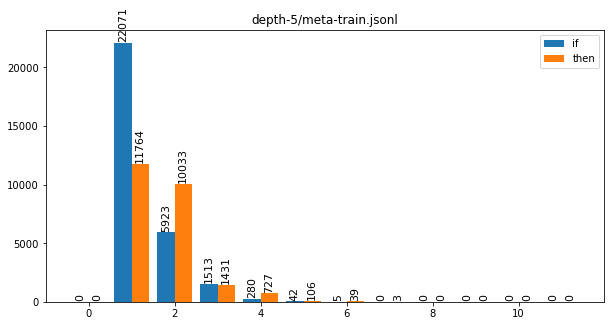

In [6]:
data_paths = [

    # 'data/rule-reasoning-dataset-V2020.2.5.0/original/depth-{}/meta-dev.jsonl',
    # 'data/rule-reasoning-dataset-V2020.2.5.0/original/depth-{}/meta-test.jsonl', 
    'data/rule-reasoning-dataset-V2020.2.5.0/original/depth-{}/meta-train.jsonl', 
]

for i in [0,1,2,3,5]:
    for j in data_paths:
        plot_if_then_count_bar(j.format(i))

In [7]:
matchObj = re.match( '"(.+)" "is" "smart"', '"something" "is" "smart" "+"', re.M|re.I)


In [8]:
matchObj.lastindex

1